In [ ]:
import sys
from src import FEFF
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import ROOT
import multiprocessing
from scipy import interpolate
import matplotlib.colors as colors
import importlib
from scipy import constants
from scipy import ndimage

In [69]:

'choose the top dir as you wish'
top_dir = '/media/ata/HDD/PhD_data/feff_no_core_hole'

modes = ["EXAFS", 'XANES']
edges = ['L1','L2','L3']
momentum = np.round(np.arange(0.1,20,0.02),2)
config = FEFF.simulation_config(modes,edges,momentum,top_dir,compton=True)
xsection = FEFF.build_xsection(config)    


In [70]:
# just to check configs 
for count, i in enumerate(config):
    print(i)
    if count>10:
        break

('EXAFS', 'L1', 0.1, '/media/ata/HDD/PhD_data/feff_no_core_hole/EXAFS/L1/momentum_0.1')
('EXAFS', 'L1', 0.12, '/media/ata/HDD/PhD_data/feff_no_core_hole/EXAFS/L1/momentum_0.12')
('EXAFS', 'L1', 0.14, '/media/ata/HDD/PhD_data/feff_no_core_hole/EXAFS/L1/momentum_0.14')
('EXAFS', 'L1', 0.16, '/media/ata/HDD/PhD_data/feff_no_core_hole/EXAFS/L1/momentum_0.16')
('EXAFS', 'L1', 0.18, '/media/ata/HDD/PhD_data/feff_no_core_hole/EXAFS/L1/momentum_0.18')
('EXAFS', 'L1', 0.2, '/media/ata/HDD/PhD_data/feff_no_core_hole/EXAFS/L1/momentum_0.2')
('EXAFS', 'L1', 0.22, '/media/ata/HDD/PhD_data/feff_no_core_hole/EXAFS/L1/momentum_0.22')
('EXAFS', 'L1', 0.24, '/media/ata/HDD/PhD_data/feff_no_core_hole/EXAFS/L1/momentum_0.24')
('EXAFS', 'L1', 0.26, '/media/ata/HDD/PhD_data/feff_no_core_hole/EXAFS/L1/momentum_0.26')
('EXAFS', 'L1', 0.28, '/media/ata/HDD/PhD_data/feff_no_core_hole/EXAFS/L1/momentum_0.28')
('EXAFS', 'L1', 0.3, '/media/ata/HDD/PhD_data/feff_no_core_hole/EXAFS/L1/momentum_0.3')
('EXAFS', 'L1', 

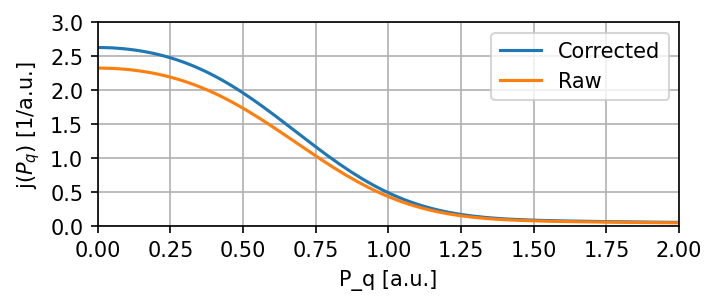

In [71]:
plt.figure(dpi = 150,figsize = (5,1.8))
pq,j = xsection.make_cp_profile(f'{top_dir}/compton/compton.dat')

cp = interpolate.interp1d(pq,j,bounds_error=False,fill_value=0)
x = np.linspace(-10,10,1000)
plt.plot(x,cp(x),label = 'Corrected')

cp = interpolate.interp1d(pq,j/1.13,bounds_error=False,fill_value=0)
x = np.linspace(-10,10,1000)
plt.plot(x,cp(x),label = 'Raw')


plt.xlabel('P_q [a.u.]')
plt.ylabel('j($P_q$) [1/a.u.]')

plt.yticks(np.arange(0, 3.1, .5))
plt.xlim(0,2)
plt.grid()
plt.ylim(0,3)
plt.legend()

In [225]:
graph = ROOT.TGraph2D()
'set the mode according to the file chosen in top of this notebook! It is just a name for plotting'
mode = 'no core-hole'
"options are valence, L1, L2, L3. For valence core-hole or no core-hole doesn't matter"
shell = 'L1'
edge = xsection.get_s_total_new(shell)
i=0
for data in edge:
    e_min = np.inf
    for e, m, s in zip(*data):
#         if s<1e-5:
#             s = 1e-5
        graph.SetPoint(i,e, m*FEFF.constants.momentum_au_to_SI,s)
        i+=1
    
x = np.linspace(50,graph.GetXmin(),20)
y = np.linspace(graph.GetYmin(),graph.GetYmax(),1000)
xx,yy = np.meshgrid(x, y)
for x_val, y_val in zip(xx.ravel(), yy.ravel()):
    graph.SetPoint(i,x_val,y_val,0)
    i = i+1


Info in <TCanvas::Print>: png file S_qw_no core-hole_L1.png has been created


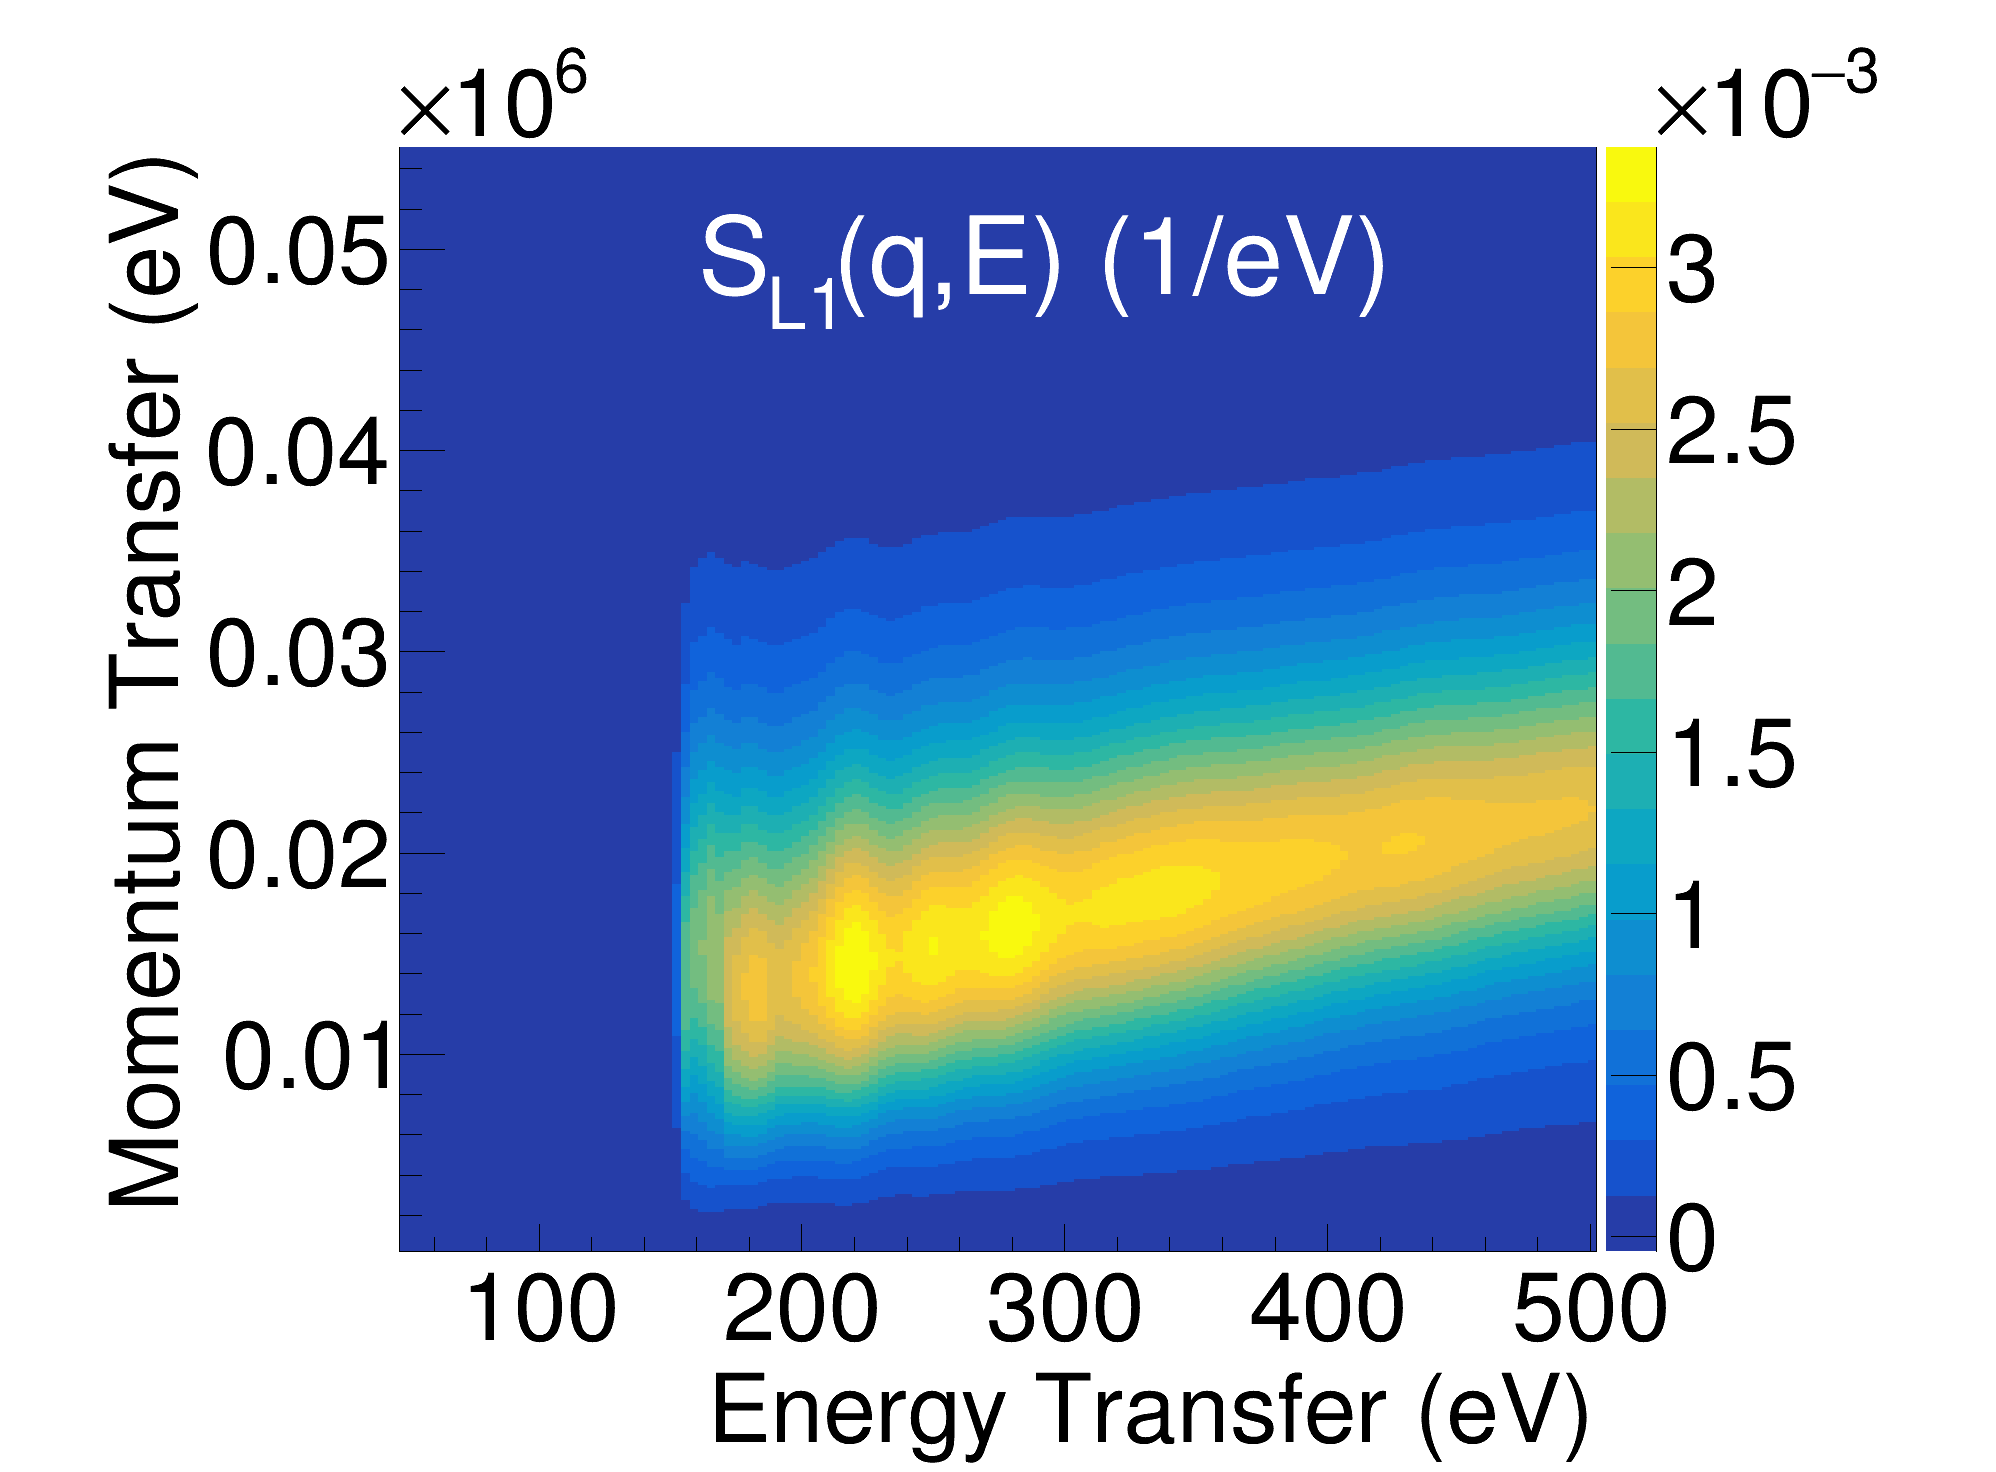

In [227]:
# graph.SetNameTitle('S(q,w)',f' ;Energy Transfer (eV);Momentum Transfer (eV);S_{{{shell}}}(q,E) (1/eV)')
graph.SetNameTitle('S(q,w)',f' ;Energy Transfer (eV);Momentum Transfer (eV)')
graph.SetNpx(500)
graph.SetNpy(500)
graph.GetXaxis().SetRangeUser(0,500)
hist = graph.GetHistogram()
hist.GetXaxis().SetRangeUser(0,500)
hist.GetYaxis().SetRangeUser(0.,0.055e6)
hist.GetYaxis().SetTitleOffset(1.1)
hist.SetTitleSize(0.07,'xyz')
hist.SetLabelSize(0.07,'xyz')
hist.SetNdivisions(506,'xy')
hist.GetYaxis().SetMaxDigits(1);
hist.GetZaxis().SetMaxDigits(2);

# hist.GetXaxis().SetMaxDigits(2);

t = ROOT.TLatex()
t.SetTextColor(ROOT.kWhite);
t.SetTextFont(42);
t.SetTextSize(0.08);

c = ROOT.TCanvas('','',2000,1500)
hist.Draw("COLZ");
hist.GetZaxis().CenterTitle()
t.DrawLatexNDC(0.35,0.8,f"S_{{{shell}}}(q,E) (1/eV)")

c.SetLeftMargin(0.2)
c.SetRightMargin(0.2)
c.SetBottomMargin(0.15)
c.Draw()
# c.SaveAs(f'S_qw_{mode}_{shell}.png')
palette = hist.FindObject("palette"); 

# palette.SetTitleOffset(1);
palette.SetX1NDC(0.805);
palette.SetX2NDC(0.83);

c.SaveAs(f'S_qw_{mode}_{shell}.png')

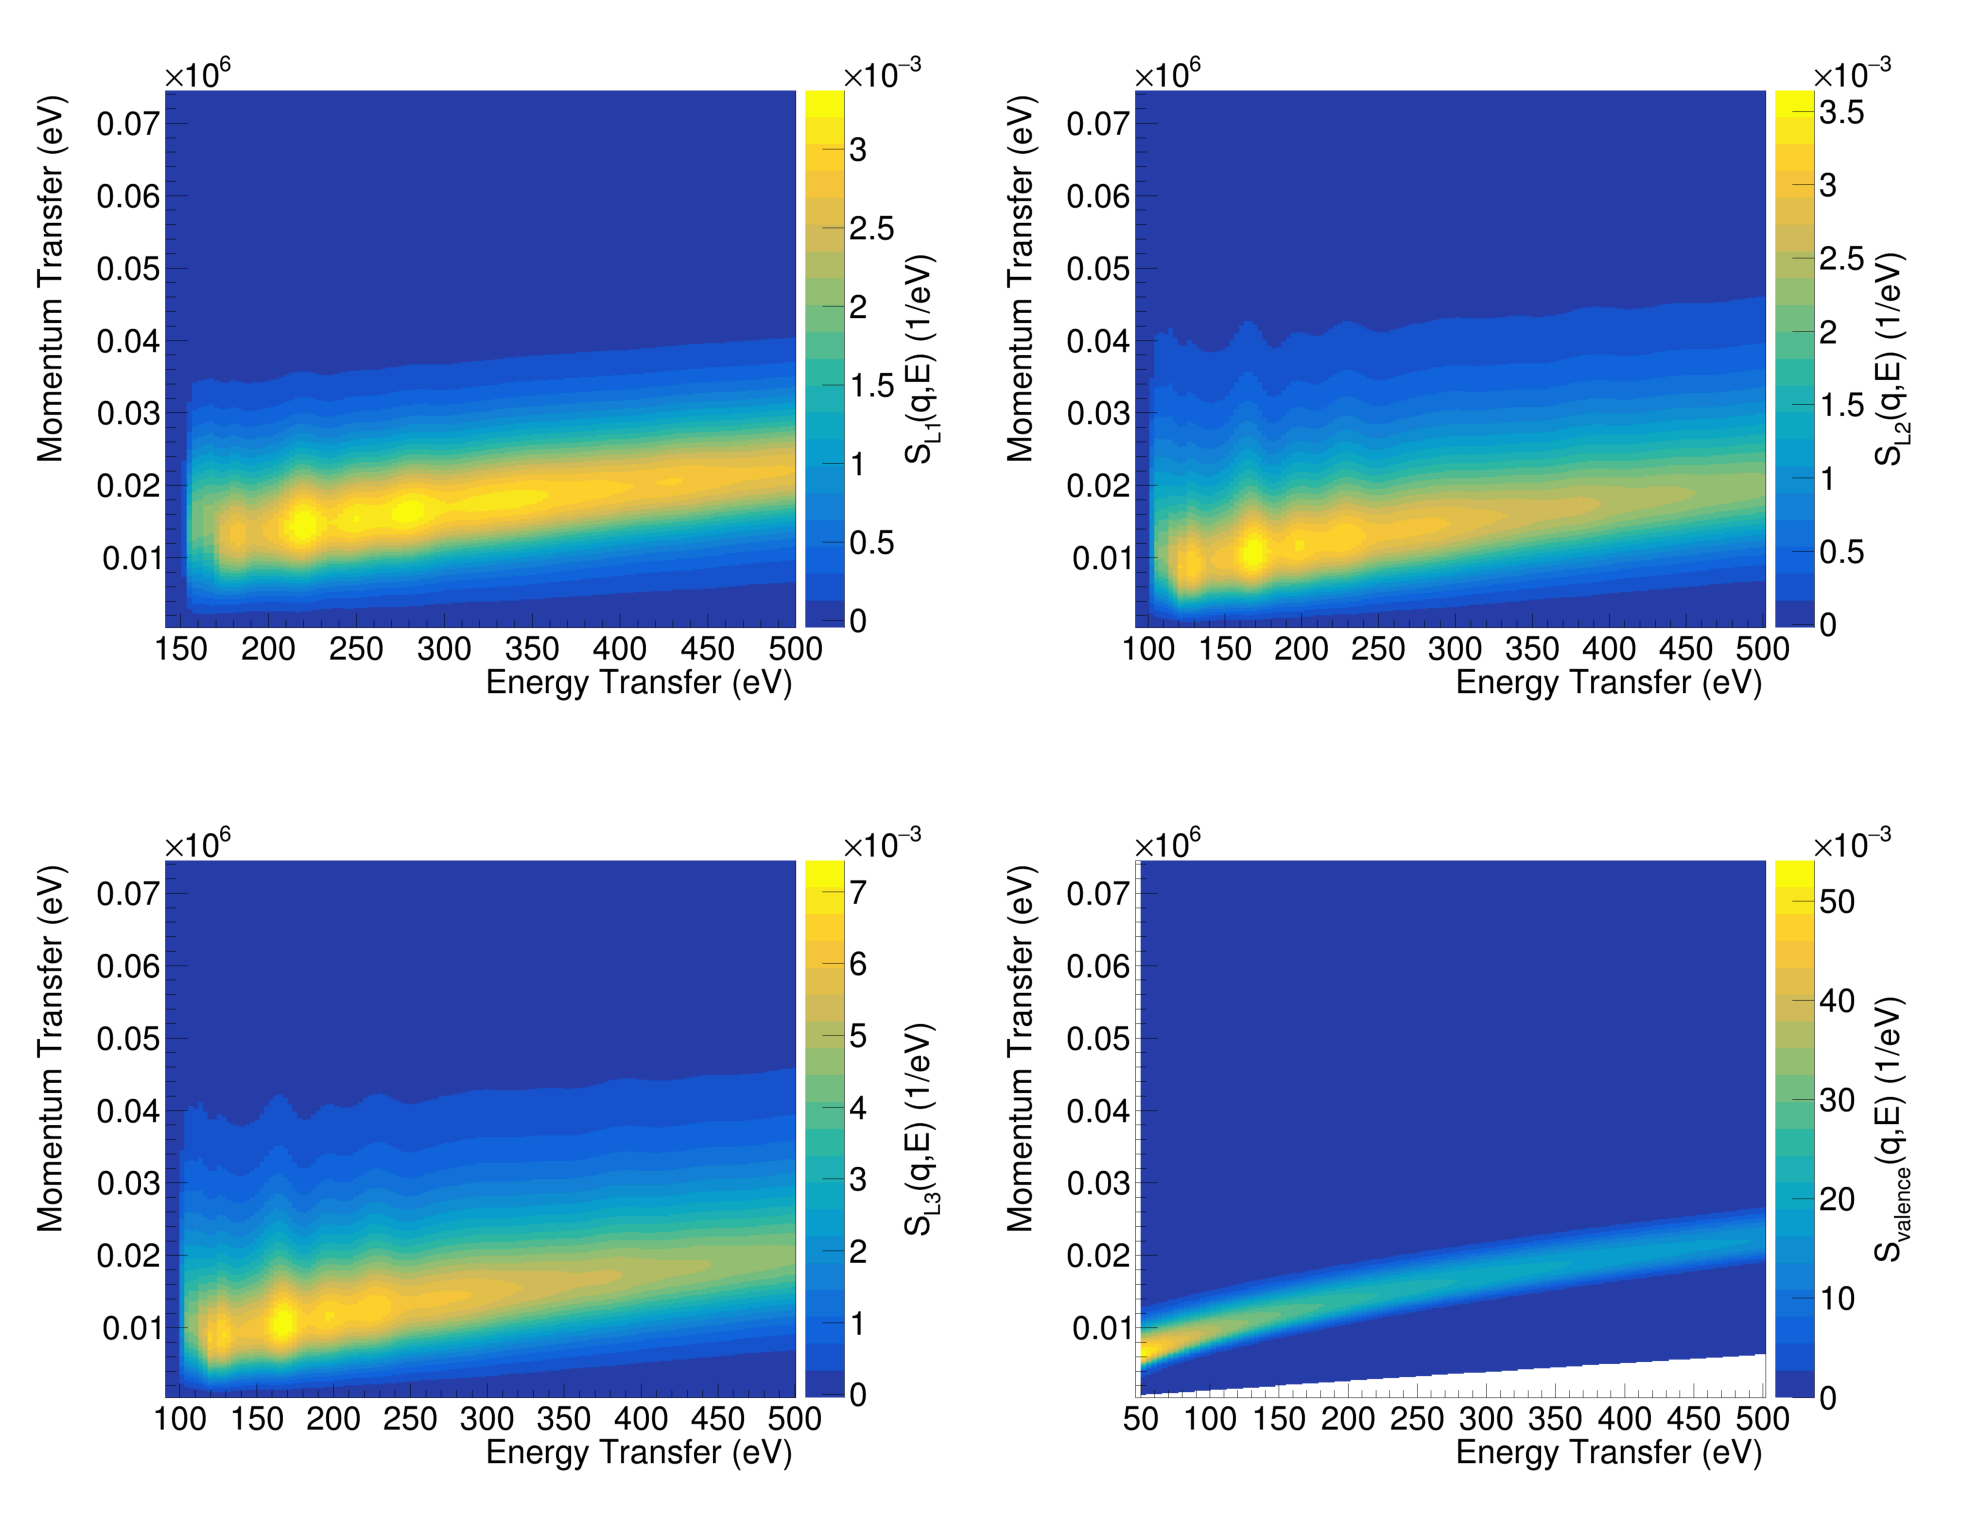

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the images
img1 = mpimg.imread('/home/ata/cdms/supercdms_compton_repo/hvev_r13_compton_calibration/FEFF/S_qw_no core-hole_L1.png')
img2 = mpimg.imread('/home/ata/cdms/supercdms_compton_repo/hvev_r13_compton_calibration/FEFF/S_qw_no core-hole_L2.png')
img3 = mpimg.imread('/home/ata/cdms/supercdms_compton_repo/hvev_r13_compton_calibration/FEFF/S_qw_no core-hole_L3.png')
img4 = mpimg.imread('/home/ata/cdms/supercdms_compton_repo/hvev_r13_compton_calibration/FEFF/S_qw_no core-hole_valence.png')

# Create a figure and a grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8),dpi= 200)
plt.subplots_adjust(wspace=0, hspace=0)


# Arrange images in the grid
axs[0, 0].imshow(img1)
# axs[0, 0].set_title('L1')
axs[0, 0].axis('off')

axs[0, 1].imshow(img2)
# axs[0, 1].set_title('L2')
axs[0, 1].axis('off')

axs[1, 0].imshow(img3)
# axs[1, 0].set_title('L3')
axs[1, 0].axis('off')

axs[1, 1].imshow(img4)
# axs[1, 1].set_title('Valence')
axs[1, 1].axis('off')



# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [14]:
modes = ["EXAFS", 'XANES']
edges = ['L1','L2','L3']
'choose the top dir as you wish'
top_dir = '/media/ata/HDD/PhD_data/feff_core_hole'

momentum = np.round(np.arange(0.1,20,0.02),2)
config = FEFF.simulation_config(modes,edges,momentum,top_dir,compton=True)
xsection = FEFF.build_xsection(config)    


In [15]:
'get iterator to data files'
iters = {}
for shell in ['L1','L2','L3','valence']:
    iters[shell] = xsection.get_s_total_new(shell)

'this is the setup for the data files'
momentum = np.round(np.arange(0.1,20,0.02),2)

'iterator until the desired momentum'
p = 5.1 # atomic units a.u.
iteration_count = np.sum(momentum<=p)
for i in range(iteration_count):
    data={shell:next(iters[shell]) for shell in ['L1','L2','L3','valence']}

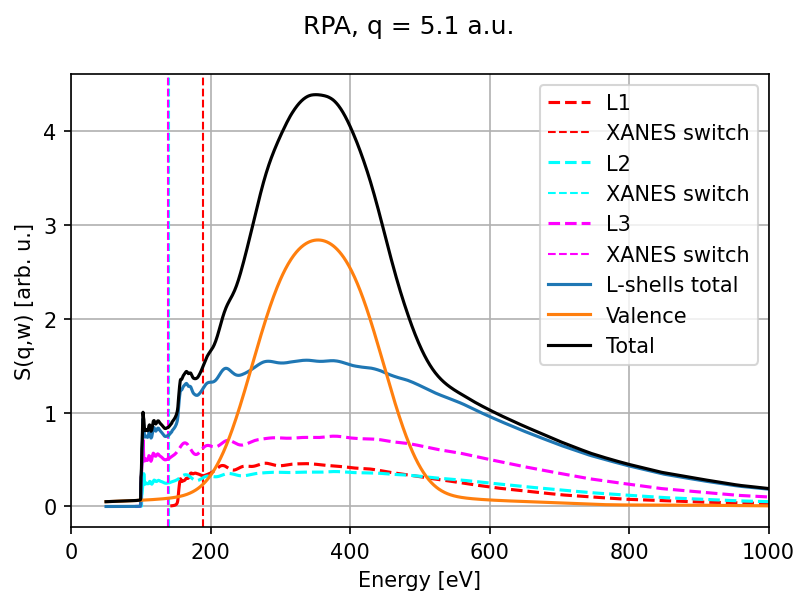

In [16]:
plt.figure(dpi =150)

'Switch number between XANES and XAFS is hard coded.'
switch_energy = 45 

mode = 'RPA'
colors = {'L1':'red',
          'L2':'cyan',
          'L3':'magenta'}

'make plots'
y_L = 0
y_valence = 0
e_interp = np.linspace(50,1000,5000)

for shell in data:
    x = data[shell][0]
    y = data[shell][2]*150
    EXAFS_switch = x[0]+45
    XANES_mask = x< EXAFS_switch
    if shell != 'valence':
        plt.plot(x[XANES_mask],y[XANES_mask],c = colors[shell],linestyle ='-')
        plt.plot(x[~XANES_mask],y[~XANES_mask],c = colors[shell],label = shell,linestyle ='--')
        plt.axvline(EXAFS_switch,c = colors[shell],linewidth=1,linestyle='--',label = 'XANES switch')
        y_L += np.interp(e_interp, x, y,left=0.,right=0.)
    else:
        y_valence += np.interp(e_interp, x, y,left=0.,right=0.)
        
plt.plot(e_interp,y_L,label= 'L-shells total')
plt.plot(e_interp,y_valence,label= 'Valence')
plt.plot(e_interp,y_L+y_valence,c='k',label ='Total')

q = next(data[shell][1])
plt.suptitle(f'{mode}, q = {q} a.u.')
plt.xlabel('Energy [eV]')
plt.ylabel('S(q,w) [arb. u.]')
plt.xlim(0,1000)
plt.grid()
plt.legend()

In [17]:
modes = ["EXAFS", 'XANES']
edges = ['L1','L2','L3']
'choose the top dir as you wish'
top_dir = '/media/ata/HDD/PhD_data/feff_no_core_hole'

momentum = np.round(np.arange(0.1,20,0.02),2)
config = FEFF.simulation_config(modes,edges,momentum,top_dir,compton=True)
xsection = FEFF.build_xsection(config)    


Text(0.5, 0.98, 'no core-hole, S$_{total}$(q, w) = Valence + L-shells')

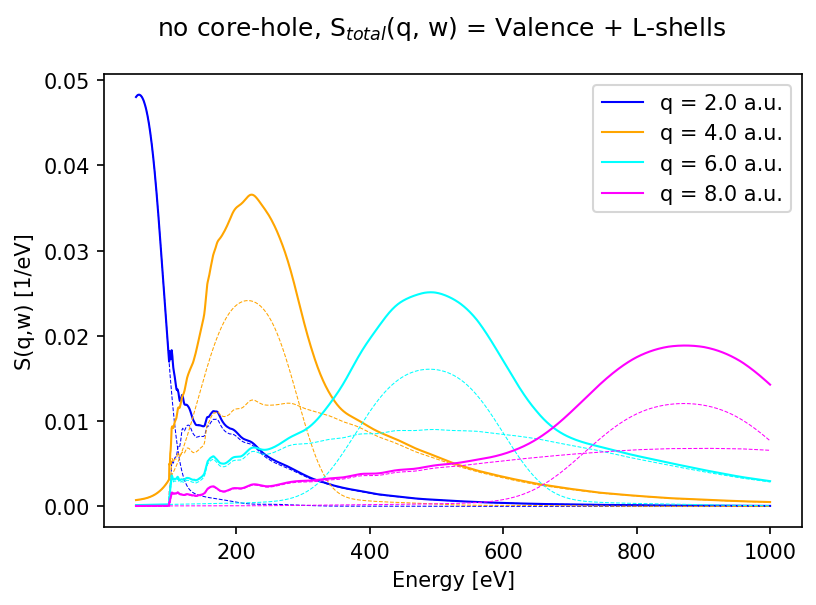

In [18]:
def make_total_plot(ax, data,c='k'):
    y_L = 0
    y_valence = 0
    e_interp = np.linspace(50,1000,5000)
    for shell in data:
        x = data[shell][0]
        y = data[shell][2]
        if shell != 'valence':
            y_L += np.interp(e_interp, x, y,left=0.,right=0.)
        else:
            y_valence += np.interp(e_interp, x, y,left=0.,right=0.)
    q = next(data[shell][1])
    ax.plot(e_interp,y_L,c = c,linewidth=0.5,linestyle ='--')
    ax.plot(e_interp,y_valence,c = c,linewidth=0.5,linestyle ='--')
    ax.plot(e_interp,y_L+y_valence,c= c,label= f'q = {q} a.u.',linewidth=1)


'get iterator to data files'
iters = {}
for shell in ['L1','L2','L3','valence']:
    iters[shell] = xsection.get_s_total_new(shell)

'this is the setup for the data files'
momentum = np.round(np.arange(0.1,20,0.02),2)
mode = 'no core-hole'

'iterator until the the desired momentum'
p_list = [2,4,6,8]
colors = ['b','orange','cyan','magenta']
accumulated_steps = [np.sum(momentum<=p) for p in p_list]
diff_steps =np.diff(accumulated_steps)
n_steps = [accumulated_steps[0],*diff_steps]

fig, ax = plt.subplots(dpi = 150)
for count, n_step in enumerate(n_steps): 
    for i in range(n_step):
        data={shell:next(iters[shell]) for shell in ['L1','L2','L3','valence']}
    make_total_plot(ax, data,colors[count])
ax.legend()
ax.set_xlabel('Energy [eV]')
ax.set_ylabel('S(q,w) [1/eV]')
fig.suptitle(f'{mode}, '+'S$_{total}$(q, w) = Valence + L-shells')
